### Exploring Health Care data using Pandas

The US famously has the most expensive healthcare system in the world. Study after study shows that while costs for the same course of treatment vary widely between hospitals, patient outcomes are generally not correlated with these costs. Compounding this problem is the fact that healthcare treatment and cost data are notoriously difficult to interpret. So most people do not consider costs when seeking treatment. However, you as a data scientist are much better equipped to do so than an average consumer. Where would you seek treatment?

(if you don't want to become a data scientist in order to be more confident about where to seek treatment, you can always move any other country which provides free or affordable healthcare)

In [113]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_csv("data/hospital-costs.csv")

In [115]:
df.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2011,324,Adirondack Medical Center-Saranac Lake Site,4,4,Tracheostomy W MV 96+ Hours W Extensive Proced...,Extreme,P,Surgical,3,361289.0,210882.0,196080.0,123347.0
1,2011,324,Adirondack Medical Center-Saranac Lake Site,5,4,Tracheostomy W MV 96+ Hours W/O Extensive Proc...,Extreme,P,Surgical,1,102190.0,102190.0,59641.0,59641.0
2,2011,324,Adirondack Medical Center-Saranac Lake Site,24,2,Extracranial Vascular Procedures,Moderate,P,Surgical,6,14172.0,13506.0,6888.0,6445.0
3,2011,324,Adirondack Medical Center-Saranac Lake Site,26,1,Other Nervous System & Related Procedures,Minor,P,Surgical,1,8833.0,8833.0,4259.0,4259.0
4,2011,324,Adirondack Medical Center-Saranac Lake Site,41,1,Nervous System Malignancy,Minor,M,Medical,1,5264.0,5264.0,1727.0,1727.0


In [116]:
df.describe()

,Year,Facility Id,APR DRG Code,APR Severity of Illness Code,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
count,383493.000000,383493.000000,383493.000000,383493.000000,383493.000000,3.834930e+05,3.834930e+05,3.834930e+05,3.834930e+05
mean,2009.992096,931.197406,375.874013,2.338846,20.514742,4.057436e+04,3.718595e+04,1.683462e+04,1.527954e+04
std,0.816167,633.379977,246.981328,1.042050,79.758116,6.591054e+04,6.261059e+04,2.952751e+04,2.782836e+04
min,2009.000000,1.000000,1.000000,0.000000,1.000000,8.000000e+00,8.000000e+00,2.000000e+00,2.000000e+00
25%,2009.000000,511.000000,192.000000,1.000000,2.000000,1.180900e+04,1.062500e+04,4.995000e+03,4.457000e+03
50%,2010.000000,889.000000,313.000000,2.000000,5.000000,2.219100e+04,1.994200e+04,8.900000e+03,7.860000e+03
75%,2011.000000,1306.000000,546.000000,3.000000,16.000000,4.393600e+04,3.971000e+04,1.775800e+04,1.587700e+04
max,2011.000000,9250.000000,956.000000,4.000000,6342.000000,4.736482e+06,4.736482e+06,2.395947e+06,2.395947e+06


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383493 entries, 0 to 383492
Data columns (total 14 columns):
Year                                   383493 non-null int64
Facility Id                            383493 non-null int64
Facility Name                          383493 non-null object
APR DRG Code                           383493 non-null int64
APR Severity of Illness Code           383493 non-null int64
APR DRG Description                    383493 non-null object
APR Severity of Illness Description    383329 non-null object
APR Medical Surgical Code              383329 non-null object
APR Medical Surgical Description       383493 non-null object
Discharges                             383493 non-null int64
Mean Charge                            383493 non-null float64
Median Charge                          383493 non-null float64
Mean Cost                              383493 non-null float64
Median Cost                            383493 non-null float64
dtypes: float64(4), in

***1. Create a new column "Total Charges" using "Discharges" and "Mean Charge".***

In [118]:
df.Discharges.head() #discharges = charge / cost

0    3
1    1
2    6
3    1
4    1
Name: Discharges, dtype: int64

In [119]:
df['Mean Charge'].head()

0    361289.0
1    102190.0
2     14172.0
3      8833.0
4      5264.0
Name: Mean Charge, dtype: float64

In [120]:
df['Total Charge'] = df['Discharges'] * df['Mean Charge']

In [121]:
df['Total Charge'].head()

0    1083867.0
1     102190.0
2      85032.0
3       8833.0
4       5264.0
Name: Total Charge, dtype: float64

***2.Do the same for the "Total Costs" using "Mean Cost".***

In [122]:
df['Total Cost'] = df['Discharges'] * df['Mean Cost']

***3.With these two new "Total Charges" and "Total Costs" columns, calculate the charges to costs "markup" rate.***

In [123]:
df['Markup'] = df['Mean Charge'] / df['Mean Cost']

In [124]:
df.Markup.head()

0    1.842559
1    1.713419
2    2.057491
3    2.073961
4    3.048060
Name: Markup, dtype: float64

***4.Tell me which facility has the highest "markup" rate, and which one has the lowest "markup" rate. (It's always good to do a sanity check, do these results make sense to you?)***

In [125]:
markups = df.sort_values(by='Markup', ascending=False)

markups = markups[['Facility Name', 'APR DRG Description',
    'Total Charge', 'Total Cost', 'Markup']]

In [126]:
markups.head(1)

,Facility Name,APR DRG Description,Total Charge,Total Cost,Markup
111925,SUNY Downstate Medical Center at LICH,Neonate Bwt 1500-1999G W Or W/O Other Signific...,43088.0,2068.0,20.83559


In [127]:
markups.tail(1)

,Facility Name,APR DRG Description,Total Charge,Total Cost,Markup
370760,TLC Health Network Tri-County Memorial Hospital,Alcohol & Drug Dependence W Rehab Or Rehab/Det...,1540540.0,97482510.0,0.015803


Bonus: What if we want to look at procedures with the highest and lowest averaged markup across facilities?

In [128]:
test = df.groupby('Facility Name').mean()

In [129]:
test.head(1)

,Year,Facility Id,APR DRG Code,APR Severity of Illness Code,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charge,Total Cost,Markup
Facility Name,,,,,,,,,,,,
Adirondack Medical Center-Saranac Lake Site,2009.990579,324.0,366.404441,2.253701,6.127187,18744.461642,17897.343876,9967.238896,9496.32638,95271.533647,52104.753701,1.943545


In [130]:
markups = (df.groupby('Facility Name').mean()
   .sort_values(by='Markup', ascending=False))

In [131]:
markups.head(1)

,Year,Facility Id,APR DRG Code,APR Severity of Illness Code,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charge,Total Cost,Markup
Facility Name,,,,,,,,,,,,
Lenox Hill Hospital,2010.001391,1450.0,377.785814,2.379346,32.439499,110780.640821,100378.734701,25108.503477,22646.033727,1.825032e+06,511554.031989,5.526728


In [132]:
markups.tail(1)

,Year,Facility Id,APR DRG Code,APR Severity of Illness Code,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charge,Total Cost,Markup
Facility Name,,,,,,,,,,,,
Rockefeller University Hospital,2009.846154,1465.0,509.384615,1.076923,4.076923,20880.230769,23052.076923,56156.923077,61997.692308,144946.538462,389833.692308,0.371829


***I wonder what everyone is going to the hospital for... Use a groupby method on the Description column and sum the Discharges.What are the top 10 reasons people are going to the hospital for, and how many people did they see.***

In [133]:
(df[['APR DRG Description', 'Discharges']].groupby('APR DRG Description')
    .sum()
    .sort_values(by='Discharges', ascending=False)
    .head(10))

,Discharges
APR DRG Description,
"Neonate Birthwt >2499G, Normal Newborn Or Neonate W Other Problem",632412
Vaginal Delivery,458034
Cesarean Delivery,245265
Heart Failure,173826
Other Pneumonia,162344
Septicemia & Disseminated Infections,161739
Chronic Obstructive Pulmonary Disease,146461
Cellulitis & Other Bacterial Skin Infections,124617
Cardiac Arrhythmia & Conduction Disorders,121042


### Now, let's follow the money...

Now we want to see which hospital has the most money coming. To keep this from getting messy, lets create a new DataFrame with only the columns we care about.

***1.Create a new DataFrame named "net" that is only the Facility Name, Total Charge, Total Cost from our original DataFrame***

In [134]:
df.columns

Index(['Year', 'Facility Id', 'Facility Name', 'APR DRG Code',
       'APR Severity of Illness Code', 'APR DRG Description',
       'APR Severity of Illness Description', 'APR Medical Surgical Code',
       'APR Medical Surgical Description', 'Discharges', 'Mean Charge',
       'Median Charge', 'Mean Cost', 'Median Cost', 'Total Charge',
       'Total Cost', 'Markup'],
      dtype='object')

In [135]:
net = df[['Facility Name','Total Charge','Total Cost']]

In [136]:
net.head()

,Facility Name,Total Charge,Total Cost
0,Adirondack Medical Center-Saranac Lake Site,1083867.0,588240.0
1,Adirondack Medical Center-Saranac Lake Site,102190.0,59641.0
2,Adirondack Medical Center-Saranac Lake Site,85032.0,41328.0
3,Adirondack Medical Center-Saranac Lake Site,8833.0,4259.0
4,Adirondack Medical Center-Saranac Lake Site,5264.0,1727.0


***2.Find the total amount each hospital spent, and how much they charged. (Group your data by Facility names, and sum all the total costs and total charges)***

In [137]:
net = net.groupby('Facility Name').sum()

In [138]:
net.head()

,Total Charge,Total Cost
Facility Name,,
Adirondack Medical Center-Saranac Lake Site,1.415735e+08,7.742766e+07
Albany Medical Center - South Clinical Campus,1.802808e+06,1.432784e+06
Albany Medical Center Hospital,3.763945e+09,1.336299e+09
Albany Memorial Hospital,2.219740e+08,9.490717e+07
Alice Hyde Medical Center,8.723797e+07,4.105882e+07


In [139]:
net['net_income'] = net['Total Charge'] - net['Total Cost']

In [140]:
net.sort_values(by= 'net_income',ascending = False).head()

,Total Charge,Total Cost,net_income
Facility Name,,,
North Shore University Hospital,7.984556e+09,1.933824e+09,6.050732e+09
New York Presbyterian Hospital - Columbia Presbyterian Center,8.884406e+09,3.278723e+09,5.605683e+09
New York Presbyterian Hospital - New York Weill Cornell Center,6.889940e+09,2.543192e+09,4.346747e+09
Mount Sinai Hospital,7.321689e+09,3.069224e+09,4.252465e+09
Westchester Medical Center,6.095486e+09,2.047654e+09,4.047832e+09


In [141]:
net.sort_values(by= 'net_income',ascending = False).tail()

,Total Charge,Total Cost,net_income
Facility Name,,,
"River Hospital, Inc.",2175391.0,3497205.0,-1321814.0
Rockefeller University Hospital,1884305.0,5067838.0,-3183533.0
Elizabethtown Community Hospital,8988443.0,12516017.0,-3527574.0
Catskill Regional Medical Center - G. Hermann Site,4670920.0,8332317.0,-3661397.0
TLC Health Network Tri-County Memorial Hospital,4212448.0,199028516.0,-194816068.0


### Now, let's focus in on Viral Meningitis

***1. Create a new dataframe that only contains the data corresponding to Viral Meningitis***

In [142]:
df_menen = df[df['APR DRG Description'] == "Viral Meningitis"]

***2.Now, with our new dataframe, only keep the data columns we care about which are***

In [144]:
df_menen = df_menen[["Facility Name", "APR DRG Description",
                     "APR Severity of Illness Description","Discharges", 
                     "Mean Charge", "Median Charge", "Mean Cost"]]

***3.Find which hospital is the least expensive (based on "Mean Charge") for treating Moderate cases of VM. [note example below is the most expensive not the least]***

In [145]:
df_menen['Mean Charge'].min()

1179.0

In [146]:
max(df_menen['Mean Charge'])

449628.0

***First way, stating several conditions at the same time and combining them with & or |***

In [147]:
df_menen[(df_menen['APR Severity of Illness Description'] == 'Moderate') & (df_menen['Mean Charge'] == min(df_menen['Mean Charge']))]

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost
258259,Aurelia Osborn Fox Memorial Hospital,Viral Meningitis,Moderate,1,1179.0,1179.0,1040.0


***Second Way***

In [148]:
moderate = df_menen[df_menen['APR Severity of Illness Description'] == 'Moderate']

(moderate[['Facility Name', 'Mean Charge']]
    .sort_values(by='Mean Charge', ascending=True).head(1))

,Facility Name,Mean Charge
258259,Aurelia Osborn Fox Memorial Hospital,1179.0


***3.Find which hospital is the least expensive for treating Moderate cases of VM that have more than 3 Discharges.***

In [149]:
df_menen[(df_menen['APR Severity of Illness Description'] == 'Moderate') 
   &
   (df_menen['Discharges'] >= 3 )].sort_values(by='Mean Charge', ascending=True).head(1)
   

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost
14426,Cayuga Medical Center at Ithaca,Viral Meningitis,Moderate,6,5738.0,5111.0,3949.0


***OR***

In [150]:
threeOrMore = moderate[moderate['Discharges'] >= 3]

(threeOrMore[['Facility Name', 'Discharges', 'Mean Charge']]
    .sort_values(by='Mean Charge', ascending=True)).head(1)

,Facility Name,Discharges,Mean Charge
14426,Cayuga Medical Center at Ithaca,6,5738.0


***5.Find which hospital discharges the most cases of Viral Meningitis for all levels of severity.***

In [152]:
# Step 1. Group all (Viral Meningitis) discharges for each hospital
group = df_menen[['Facility Name', 'Discharges']].groupby('Facility Name').sum()

# Step 2. Which hospiptals discharge the most?
group.sort_values(by='Discharges', ascending=False).head(1)

,Discharges
Facility Name,
North Shore University Hospital,158


In [153]:
group.head(3)

,Discharges
Facility Name,
Adirondack Medical Center-Saranac Lake Site,3
Albany Medical Center Hospital,96
Albany Memorial Hospital,7


***6.Find if there is a correlation between the severity of illness and the charge.***

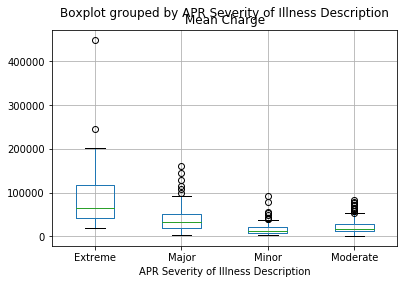

In [158]:
df_menen.boxplot('Mean Charge', by='APR Severity of Illness Description')

The correlation is therefore positive.

I wonder if the result is same when we inclde all of the illnesses.

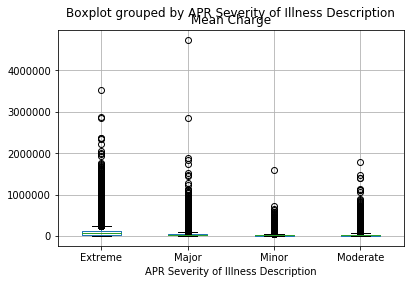

In [159]:
df.boxplot('Mean Charge', by='APR Severity of Illness Description')

Yep this tells me that if I can be rich one day, I am more likely to survive an Extreme or Major illness. So I shall work hard:)

***By default, the grouped columns (extreme, major, minor, and moderate) are sorted alphabetically. A better graph, would order the column by increased level of severity:***

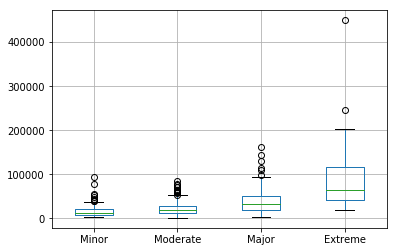

In [106]:
severities = ['Minor', 'Moderate','Major','Extreme']

pd.DataFrame({severity: df[df['APR Severity of Illness Description'] == severity]['Mean Charge'] for severity in severities},
             columns = severities).boxplot(return_type='axes')

***To calculate an actual value for the correlation, one would need to code these levels as numerics, e.g., as equally spaced integers of increasing values. Note that there is no justification for that particular encoding, making the correlation more dependent on this encoding than any reality of the population. You should then question the statistical meaningfulness of the value you would compute.***

In [160]:
# Let's first calculate the mean charge per level of severity
group = (df[['APR Severity of Illness Description', 'Mean Charge']]
    .groupby('APR Severity of Illness Description').mean()
    .reset_index())

# Let's then rank order the severity level from minor to extreme
group['APR Severity of Illness'] = (group['APR Severity of Illness Description']
    .map({'Minor': 0, 'Moderate': 1, 'Major': 2, 'Extreme': 3}))

group[['APR Severity of Illness', 'Mean Charge']].corr()

,APR Severity of Illness,Mean Charge
APR Severity of Illness,1.000000,0.925377
Mean Charge,0.925377,1.000000


### Which illness has the most discharges?

(guess:)

In [162]:
# Step 1. Group illnesses by description and severity
group = (df[['APR DRG Description', 'APR Severity of Illness Description', 'Discharges']]
    .groupby(['APR DRG Description', 'APR Severity of Illness Description'])
    .sum())

# Step 2. Which illness has the most discharges?
group.sort_values(by='Discharges', ascending=False)

Discharges
APR DRG Description                                APR Severity of Illness Description            
Neonate Birthwt >2499G, Normal Newborn Or Neona... Minor                                    528921
Vaginal Delivery                                   Minor                                    291174
Cesarean Delivery                                  Minor                                    163204
Vaginal Delivery                                   Moderate                                 142273
Neonate Birthwt >2499G, Normal Newborn Or Neona... Moderate                                  82090
Septicemia & Disseminated Infections               Extreme                                   78903
Heart Failure                                      Moderate                                  74713
                                                   Major                                     69610
Other Pneumonia                                    Moderate                                  65985
Chest Pain                                         Minor                                     65762
Schizophrenia                                      Moderate                                  63620
Renal Failure                                      Major                                     62506
Chronic Obstructive Pulmonary Disease              Moderate                                  61457
Cesarean Delivery                                  Moderate                                  60019
Septicemia & Disseminated Infections               Major                                     56935
Other Pneumonia                                    Major                                     56447
Percutaneous Cardiovascular Procedures W/O Ami     Minor                                     54098
Major Depressive Disorders & Other/Unspecified ... Moderate                                  53973
Bipolar Disorders                                  Moderate                                  52921
Chronic Obstructive Pulmonary Disease              Major                                     51690
Cellulitis & Other Bacterial Skin Infections       Moderate                                  49802
Rehabilitation                                     Moderate                                  49042
Syncope & Collapse                                 Moderate                                  48356
Cardiac Arrhythmia & Conduction Disorders          Moderate                                  47258
Knee Joint Replacement                             Moderate                                  47194
Cellulitis & Other Bacterial Skin Infections       Minor                                     46468
Opioid Abuse & Dependence                          Moderate                                  45207
Kidney & Urinary Tract Infections                  Moderate                                  44714
Chest Pain                                         Moderate                                  43582
Asthma                                             Minor                                     42810
...                                                                                            ...
Tracheostomy W MV 96+ Hours W Extensive Procedu... Minor                                        21
Orbital Procedures                                 Extreme                                      21
Female Reproductive System Reconstructive Proce... Extreme                                      21
Neonate Birthwt >2499G W Major Cardiovascular P... Minor                                        21
Neonate Birthwt 1500-1999G W Congenital/Perinat... Extreme                                      21
Neonate Bwt 1500-1999G W Or W/O Other Significa... Extreme                                      20
False Labor                                        Major                                        20
Mental Illness Diagnosis W O.R. Procedure          Extreme                                      19
Tracheostomy W MV 96+ Hours W

Good, number of discharges for extreme or major illnesses are lower compared to those of minor and moderate. We have higher chances to survive this.